## Step 1: Outline the problem

How can one differentiate between two different subreddit on the popular site reddit? 

## Step 2: TIFU and NoStupdQuestions

TIFU: Today I Fucked up. Each post is a story, told brutally honestly, of a time and a place the author "fucked up", be it a humorous story of a good intention gone wrong or a cringe-worthy foray into life, romance, or business, all for the meagre points and praise of the denizens of the internet. 

There are some rules that must be followed for every poster, such as: 
- Every post must start with TIFU
- Every post must have at least 750 characters of content
- Must be a story that contains a "fuckup", not a death/injury

NoStupidQuestions: No Stupid Questions. Each post is a simple question that may be a very thoughtful question, a completely inane one, or one that people just don't feel comfortable asking in real life to people they know? The anonymity of the internet is key here. 

Some of the rules that this subreddit must abide by:
- No repeat questions
- No joke questions
- No questions relating to suicide or sexuality(was I raped/harassed? etc.)
- No self-promotion
- No illegal/unethical/disturbing material


The moderators of both sites have ultimate power of choice as to what content appears on the subreddit, so one can be reasonably certain that any post that is up on the site passes muster. 

## Step 3: EDA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import wordcloud

In [6]:
df = pd.read_csv('final.csv')

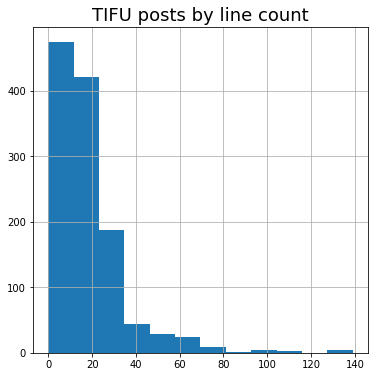

In [16]:
plt.figure(figsize = (6,6))
plt.title('TIFU posts by line count', size = 18)
df[df['subreddit_tifu'] == 1]['line_count'].hist(bins = 12)

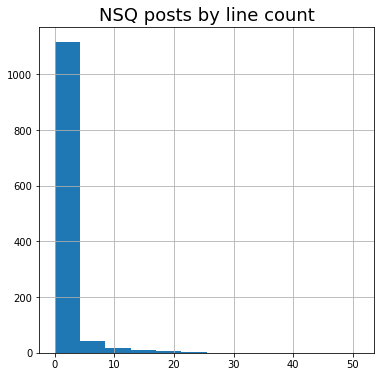

In [17]:
plt.figure(figsize = (6,6))
plt.title('NSQ posts by line count', size = 18)
df[df['subreddit_tifu'] == 0]['line_count'].hist(bins = 12)

In general, posts from TIFU had a far larger amount of line indents, denoted by \n. 

Skipping some of the longer intermediate steps(See EDA Notebook), I also compiled WordClouds of each of the highest usage words for the subreddits: 

### NoStupidQuestions:

![](images/nsq_wordcloud.png)

### TIFU:

![](images/tifu_wordcloud.png)

## Step 4: Modeling

First pass: Standard DecisionTreeClassifier. Was a tad strong. Accuracy score of...1

![](images/Model1_Perfect.png)


Second idea: Remove the all-important word that literally began every single post: TIFU. That got me this with another DEcisionTreeClassifier. Accuracy score of 97.8%

![](images/Model2_97.8.png)

Third idea: Try a Bernoilli Naive Bayes model instead. Accuracy score of 96.8%

![](images/model3_96.8.png)

## Step 5: Conclusions/Takeaways

Turns out, with the right models, it is rather easy to differentiate the two subreddits, even after removing the glaring indicator at the beginning of every post. The style of posting and writing was different enough for the model, which was not particularly adept at understanding context, to pick up enough for some rather accurate predictions. Not perfect, once the glaring indicator was gone, but still very good. In the future I would be interested in improving upon my model, gathering more posts, and possibly interacting with comments, something I immediately shied away from as an unnecessary complication. 